In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
df = pd.read_csv('facebook_ad_data.csv')


In [4]:
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   int64  
 2   fb_campaign_id       1143 non-null   int64  
 3   age                  1143 non-null   object 
 4   gender               1143 non-null   object 
 5   interest             1143 non-null   int64  
 6   Impressions          1143 non-null   int64  
 7   Clicks               1143 non-null   int64  
 8   Spent                1143 non-null   float64
 9   Total_Conversion     1143 non-null   int64  
 10  Approved_Conversion  1143 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 98.4+ KB


In [6]:
descriptive_stats = df[["Impressions", "Clicks", "Spent", "Total_Conversion", "Approved_Conversion"]].describe()
descriptive_stats

,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
count,1.143000e+03,1143.000000,1143.000000,1143.000000,1143.000000
mean,1.867321e+05,33.390201,51.360656,2.855643,0.944007
std,3.127622e+05,56.892438,86.908418,4.483593,1.737708
min,8.700000e+01,0.000000,0.000000,0.000000,0.000000
25%,6.503500e+03,1.000000,1.480000,1.000000,0.000000
50%,5.150900e+04,8.000000,12.370000,1.000000,1.000000
75%,2.217690e+05,37.500000,60.025000,3.000000,1.000000
max,3.052003e+06,421.000000,639.949998,60.000000,21.000000


In [7]:
correlations = df[["Impressions", "Clicks", "Spent", "Total_Conversion", "Approved_Conversion"]].corr()
correlations

,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
Impressions,1.000000,0.948514,0.970386,0.812838,0.684249
Clicks,0.948514,1.000000,0.992906,0.694632,0.559526
Spent,0.970386,0.992906,1.000000,0.725379,0.593178
Total_Conversion,0.812838,0.694632,0.725379,1.000000,0.864034
Approved_Conversion,0.684249,0.559526,0.593178,0.864034,1.000000


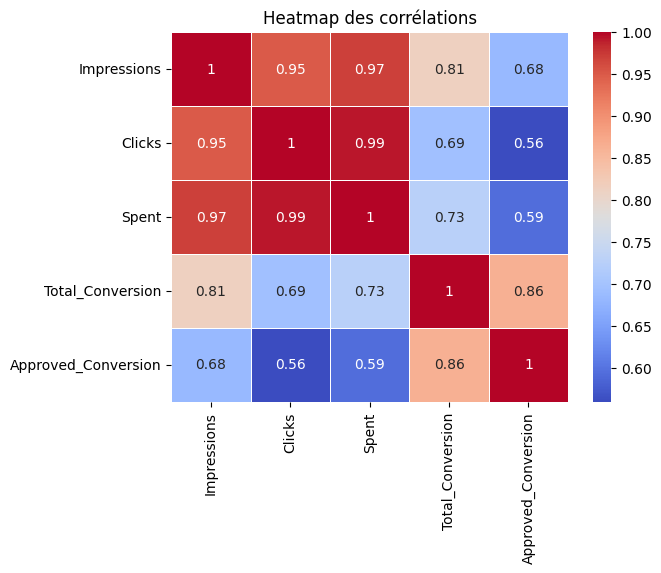

In [8]:
corr_matrix = correlations
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap des corrélations')
plt.show()


# Analyse de l'impact par campagne

In [9]:
impact_par_campagne = df.groupby("xyz_campaign_id")[["Impressions", "Clicks", "Total_Conversion", "Approved_Conversion"]].sum()
impact_par_campagne


,Impressions,Clicks,Total_Conversion,Approved_Conversion
xyz_campaign_id,,,,
916,482925,113,58,24
936,8128187,1984,537,183
1178,204823716,36068,2669,872


# Analyse de l'impact par groupe démographique

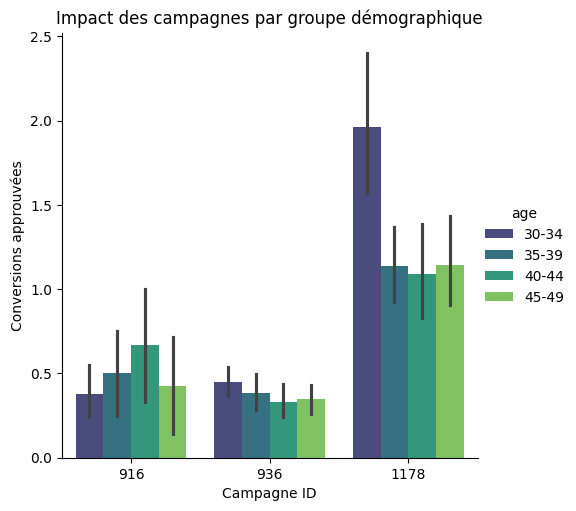

In [10]:
sns.catplot(x='xyz_campaign_id', y='Approved_Conversion', hue='age', kind='bar', data=df, palette='viridis')
plt.title('Impact des campagnes par groupe démographique')
plt.xlabel('Campagne ID')
plt.ylabel('Conversions approuvées')
plt.show()

# Analyse du Return on Investment(ROI) par campagne

C:\Users\Adame\AppData\Local\Temp\ipykernel_1640\3934372708.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='xyz_campaign_id', y='ROI', data=df, palette='viridis')


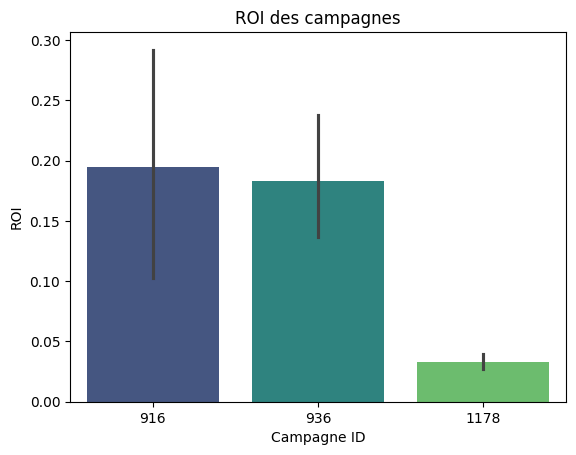

In [16]:
# Calcul du ROI
df['ROI'] = df['Approved_Conversion'] / df['Spent']
sns.barplot(x='xyz_campaign_id', y='ROI', data=df, palette='viridis')
plt.title('ROI des campagnes')
plt.xlabel('Campagne ID')
plt.show()


# Analyse de la fréquence par campagne

C:\Users\Adame\AppData\Local\Temp\ipykernel_1640\3147818788.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='xyz_campaign_id', y='Frequency', data=df, palette='viridis')


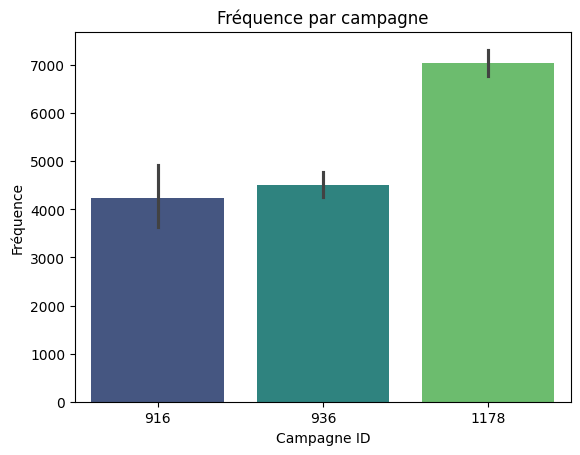

In [17]:
# Analyse de la fréquence
df['Frequency'] = df['Impressions'] / df['Clicks']
sns.barplot(x='xyz_campaign_id', y='Frequency', data=df, palette='viridis')
plt.title('Fréquence par campagne')
plt.xlabel('Campagne ID')
plt.ylabel('Fréquence')
plt.show()


# Analyse de l'impact par centre d'intérêt

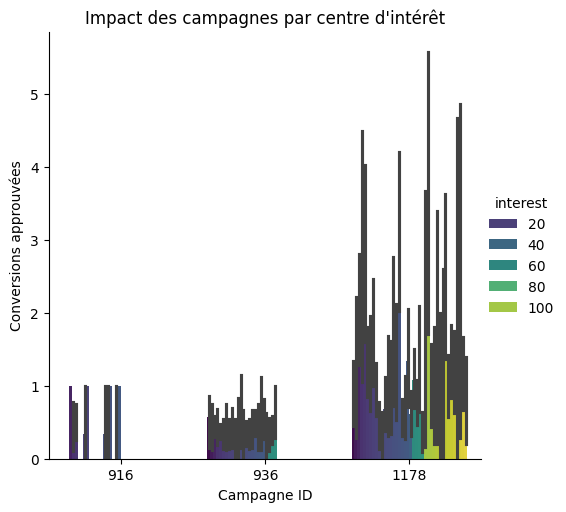

In [18]:
sns.catplot(x='xyz_campaign_id', y='Approved_Conversion', hue='interest', kind='bar', data=df, palette='viridis')
plt.title('Impact des campagnes par centre d\'intérêt')
plt.xlabel('Campagne ID')
plt.ylabel('Conversions approuvées')
plt.show()

# Analyse de l'impact par genre et âge

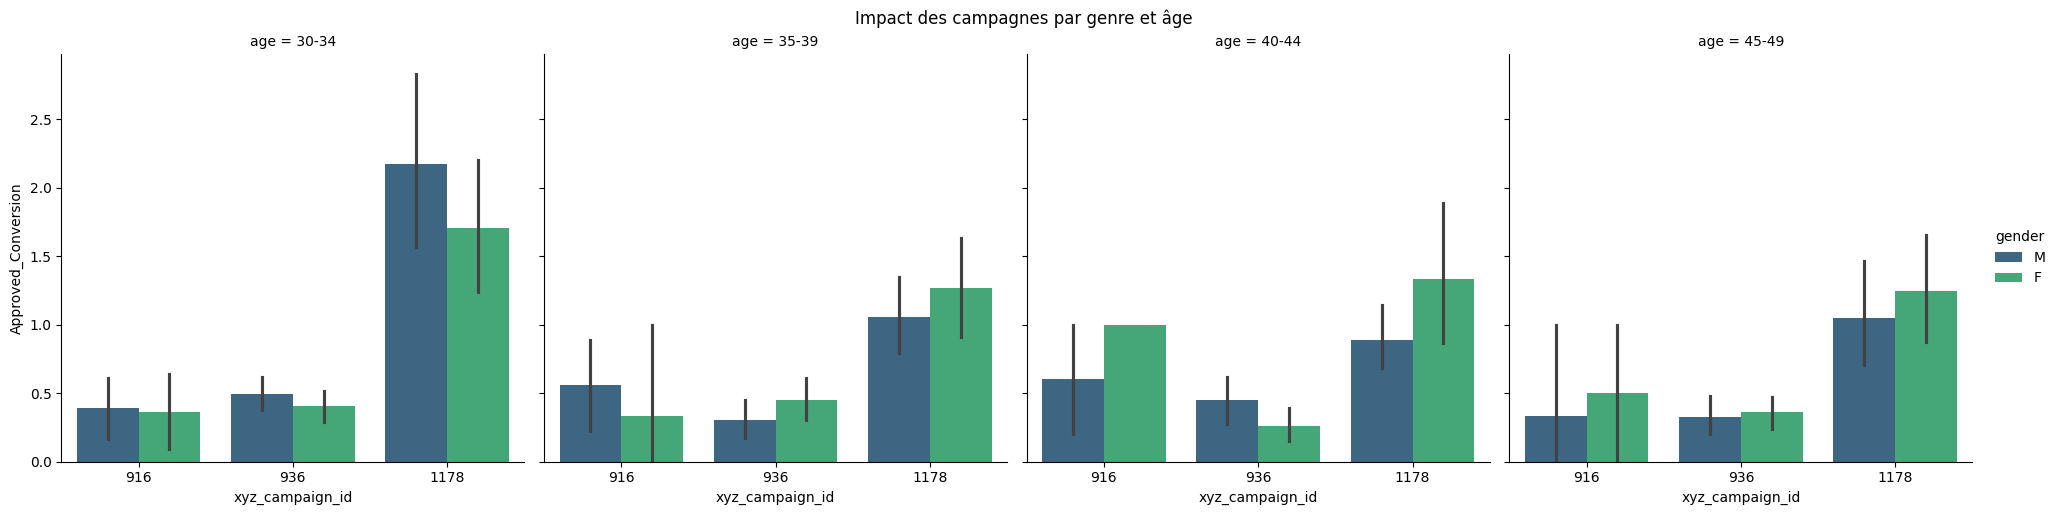

In [19]:
sns.catplot(x='xyz_campaign_id', y='Approved_Conversion', hue='gender', col='age', kind='bar', data=df, palette='viridis')
plt.suptitle('Impact des campagnes par genre et âge', y=1.02)
plt.show()


# Approbations par campagne

C:\Users\Adame\AppData\Local\Temp\ipykernel_1640\4275690095.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='xyz_campaign_id', y='Approved_Conversion', data=df, ci=None)


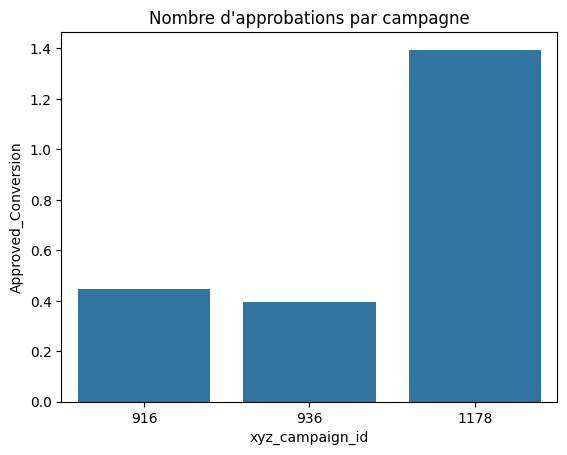

In [20]:
sns.barplot(x='xyz_campaign_id', y='Approved_Conversion', data=df, ci=None)
plt.title('Nombre d\'approbations par campagne')
plt.show()

# Analyse des tendances

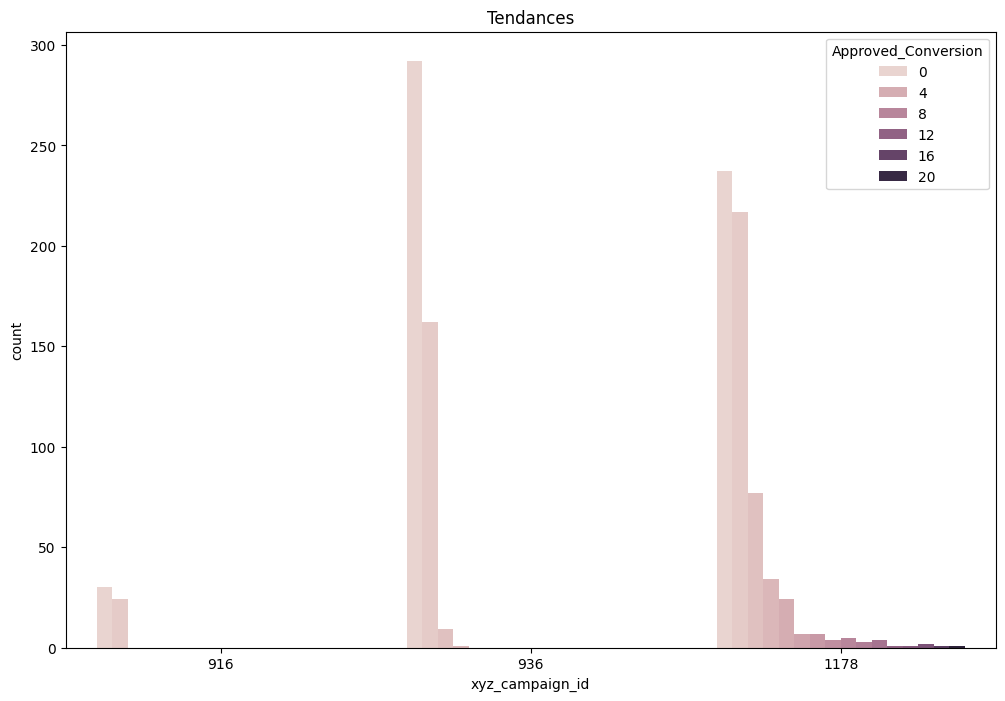

In [21]:
plt.figure(figsize=(12, 8))
sns.countplot(x='xyz_campaign_id', hue='Approved_Conversion', data=df)
plt.title('Tendances')
plt.show()

# Analyse des tendances plus détailler

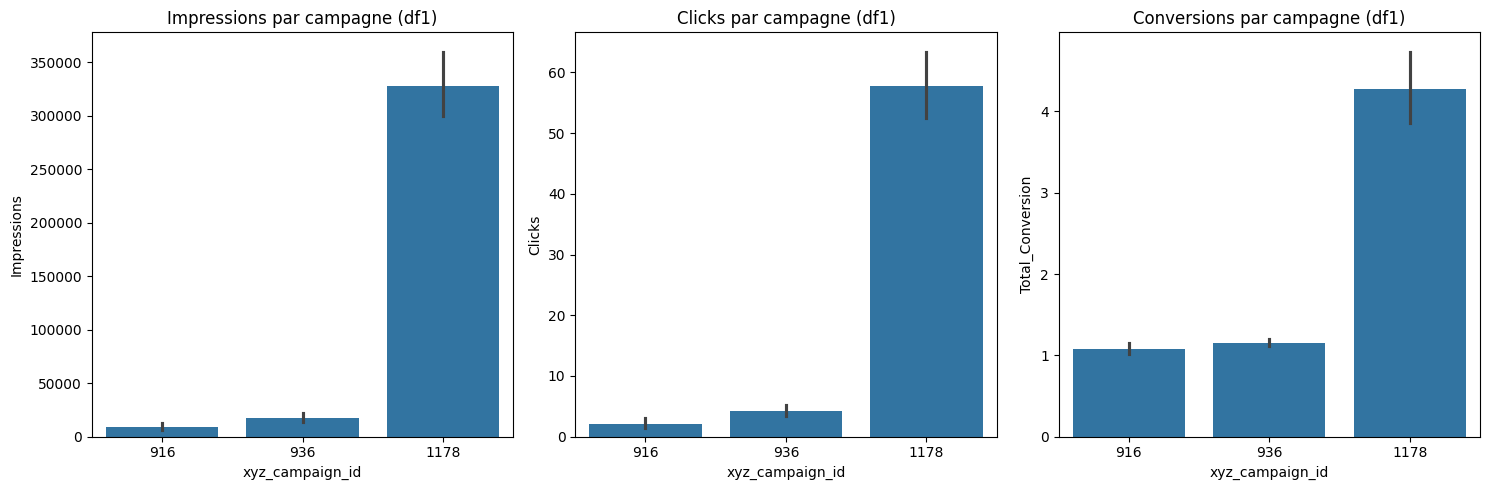

In [22]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.barplot(x='xyz_campaign_id', y='Impressions', data=df)
plt.title('Impressions par campagne (df1)')

plt.subplot(1, 3, 2)
sns.barplot(x='xyz_campaign_id', y='Clicks', data=df)
plt.title('Clicks par campagne (df1)')

plt.subplot(1, 3, 3)
sns.barplot(x='xyz_campaign_id', y='Total_Conversion', data=df)
plt.title('Conversions par campagne (df1)')

plt.tight_layout()
plt.show()

# taux de conversion par campagne

C:\Users\Adame\AppData\Local\Temp\ipykernel_1640\2693423786.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='xyz_campaign_id', y='Conversion_Rate', data=df, ci=None)


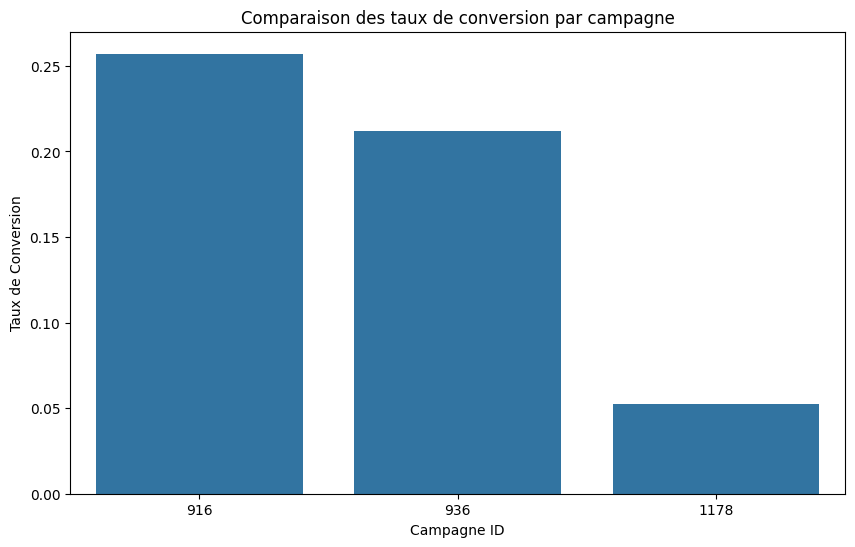

In [23]:
# Calcul des taux de conversion
df['Conversion_Rate'] = df['Approved_Conversion'] / df['Clicks']
plt.figure(figsize=(10, 6))
sns.barplot(x='xyz_campaign_id', y='Conversion_Rate', data=df, ci=None)
plt.title('Comparaison des taux de conversion par campagne')
plt.xlabel('Campagne ID')
plt.ylabel('Taux de Conversion')
plt.show()


# coût par conversion

C:\Users\Adame\AppData\Local\Temp\ipykernel_1640\2951567756.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='xyz_campaign_id', y='Cost_Per_Conversion', data=df, ci=None)


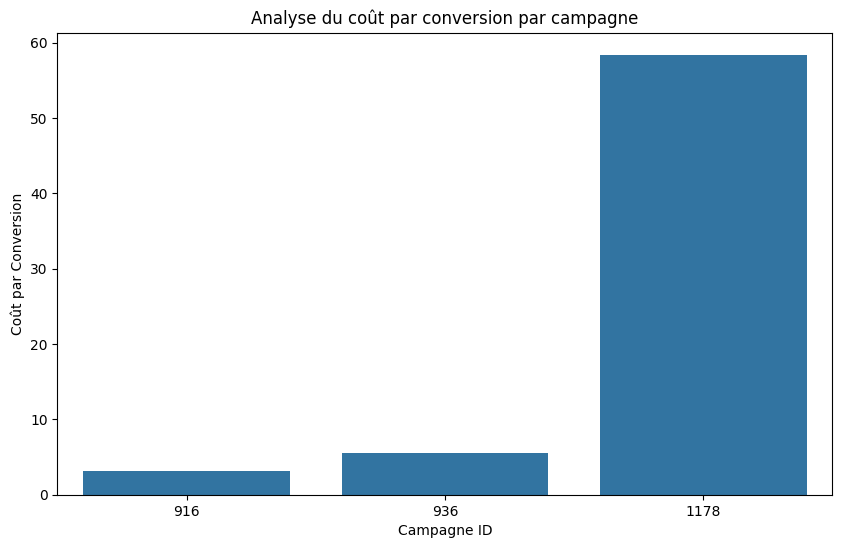

In [24]:
# Calcul du coût par conversion
df['Cost_Per_Conversion'] = df['Spent'] / df['Approved_Conversion']
plt.figure(figsize=(10, 6))
sns.barplot(x='xyz_campaign_id', y='Cost_Per_Conversion', data=df, ci=None)
plt.title('Analyse du coût par conversion par campagne')
plt.xlabel('Campagne ID')
plt.ylabel('Coût par Conversion')
plt.show()


# dépenses par campagne

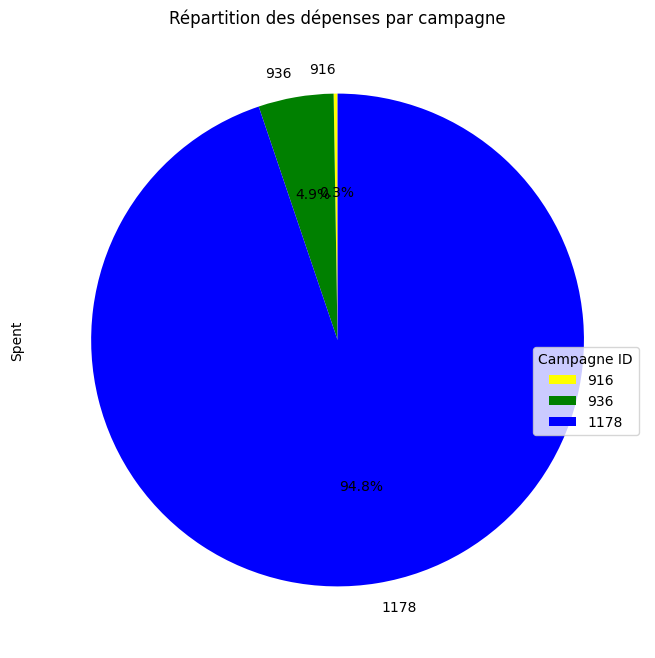

In [25]:
plt.figure(figsize=(8, 8))
expenses_by_campaign = df.groupby('xyz_campaign_id')['Spent'].sum()
expenses_by_campaign.plot.pie(autopct='%1.1f%%', startangle=90, colors=['yellow', 'green','blue' ])
plt.title('Répartition des dépenses par campagne')
plt.legend(expenses_by_campaign.index, title='Campagne ID', loc='upper right', bbox_to_anchor=(1, 0.5))
plt.show()



# Relation entre Impressions, Clicks et Conversions

In [26]:
scatter_fig = px.scatter(df[df['xyz_campaign_id'].isin([916, 936, 1178])], x='Impressions', y='Clicks', color='xyz_campaign_id', size='Approved_Conversion', hover_name='ad_id')

scatter_fig.update_layout(title='Relation entre Impressions, Clicks et Conversions (Campagnes 916, 936, 1178)')

scatter_fig.show()

In [27]:
scatter_fig = px.scatter(
    df[df['xyz_campaign_id'].isin([916, 936, 1178])],
    x='Impressions',
    y='Clicks',
    color='xyz_campaign_id',
    size='Approved_Conversion',
    hover_name='ad_id',
    facet_col='xyz_campaign_id',  # Cette ligne ajoute une séparation par campagne
)

scatter_fig.update_layout(
    title='Relation entre Impressions, Clicks et Conversions (Campagnes 916, 936, 1178)',
    height=400, 
)

scatter_fig.show()


# Conversions approuvées par genre et campagne

In [28]:
bar_fig = px.bar(df[df['xyz_campaign_id'].isin([916, 936, 1178])], x='gender', y='Approved_Conversion', color='gender', facet_col='xyz_campaign_id')
bar_fig.update_layout(title='Conversions approuvées par genre et campagne (Campagnes 916, 936, 1178)')
bar_fig.show()


In [29]:
df

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,ROI,Frequency,Conversion_Rate,Cost_Per_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.430000,2,1,0.699301,7350.000000,1.000000,1.430000
1,708749,916,103917,30-34,M,16,17861,2,1.820000,2,0,0.000000,8930.500000,0.000000,inf
2,708771,916,103920,30-34,M,20,693,0,0.000000,1,0,NaN,inf,NaN,NaN
3,708815,916,103928,30-34,M,28,4259,1,1.250000,1,0,0.000000,4259.000000,0.000000,inf
4,708818,916,103928,30-34,M,28,4133,1,1.290000,1,1,0.775194,4133.000000,1.000000,1.290000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,1314410,1178,179977,45-49,F,109,1129773,252,358.189997,13,2,0.005584,4483.226190,0.007937,179.094999
1139,1314411,1178,179978,45-49,F,110,637549,120,173.880003,3,0,0.000000,5312.908333,0.000000,inf
1140,1314412,1178,179979,45-49,F,111,151531,28,40.289999,2,0,0.000000,5411.821429,0.000000,inf
1141,1314414,1178,179981,45-49,F,113,790253,135,198.710001,8,2,0.010065,5853.725926,0.014815,99.355000
